In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

C:\Users\shank\Anaconda3\envs\el-dorado\lib\site-packages\h5py\__init__.py:37: UserWarning: h5py is running against HDF5 1.10.5 when it was built against 1.10.4, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [ ]:
keras.__version__

## Importing Dataset

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [8]:
fashion_mnist.head()

AttributeError: module 'tensorflow.keras.datasets.fashion_mnist' has no attribute 'head'

In [7]:
X_test.dtype

dtype('uint8')

## Splitting Training Data into Training set and Validation set

In [8]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Building a Model

In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Compiling the Model

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

## Fitting the Model

In [19]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7261 - accuracy: 0.7617 - val_loss: 0.5182 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4902 - accuracy: 0.8303 - val_loss: 0.4755 - val_accuracy: 0.8350
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4454 - accuracy: 0.8465 - val_loss: 0.4114 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8542 - val_loss: 0.4129 - val_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3966 - accuracy: 0.8609 - val_loss: 0.3896 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3809 - accuracy: 0.8655 - val_loss: 0.3726 - val_accuracy: 0.8742
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3664 - accuracy: 0.8712 - val_loss: 0.3680 - val_accuracy:

## Plot of the Learning Curves

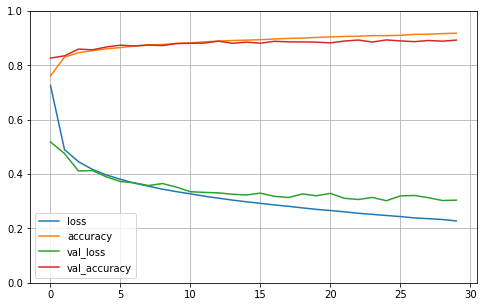

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Evaulating the Model

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 58.8879 - accuracy: 0.8585


[58.887882232666016, 0.8585000038146973]